# Benchmark Comparison

## Time per Iteration

In [ ]:
import re
import csv
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


def show():
    fig = plt.figure(figsize=(12, 16), dpi=100)
    fig.suptitle('Time per Iteration', fontsize=18, y=0.915)
    fig.text(0.5, 0.09, 'iteration', ha='center', fontsize=12)
    
    def get_data(benchmark_name):
        data = {}
        paths = glob(f'../data/{benchmark_name}_*/time.csv')
        paths.sort()
        for path in paths:
            optimizer_name = re.search(r'../data/.+_(.+)/time\.csv', path).group(1)
            with open(path) as f:
                rows = np.array([row for row in csv.reader(f)])
            row = rows[1:, 1:]
            row = row.reshape(len(row))
            row = row.astype(np.float)
            data[optimizer_name] = row
        return data
    
    benchmark_names = ('ackley', 'bukin', 'levi', 'rastrigin', 'rosenbrock')
    for i, benchmark_name in enumerate(benchmark_names):
        ax = fig.add_subplot(int('32' + str(i + 1)))
        ax.set_title(benchmark_name.capitalize())
        
        max_y = 0
        min_y = np.inf
        data = get_data(benchmark_name)
        for optimizer_name, y in data.items():
            max_y = max(y[5:]) if max(y[5:]) > max_y else max_y
            min_y = min(y[5:]) if min(y[5:]) < min_y else min_y
            
            x = np.arange(0, len(y) * 100, 100)
            ax.plot(x, y, label=optimizer_name)
        
        d = (max_y - min_y) / 10
        ax.set_ylim(min_y - d, max_y + d)
    
    plt.legend(bbox_to_anchor=(2.6, 3.4), loc='upper right', borderaxespad=1)
    plt.show()

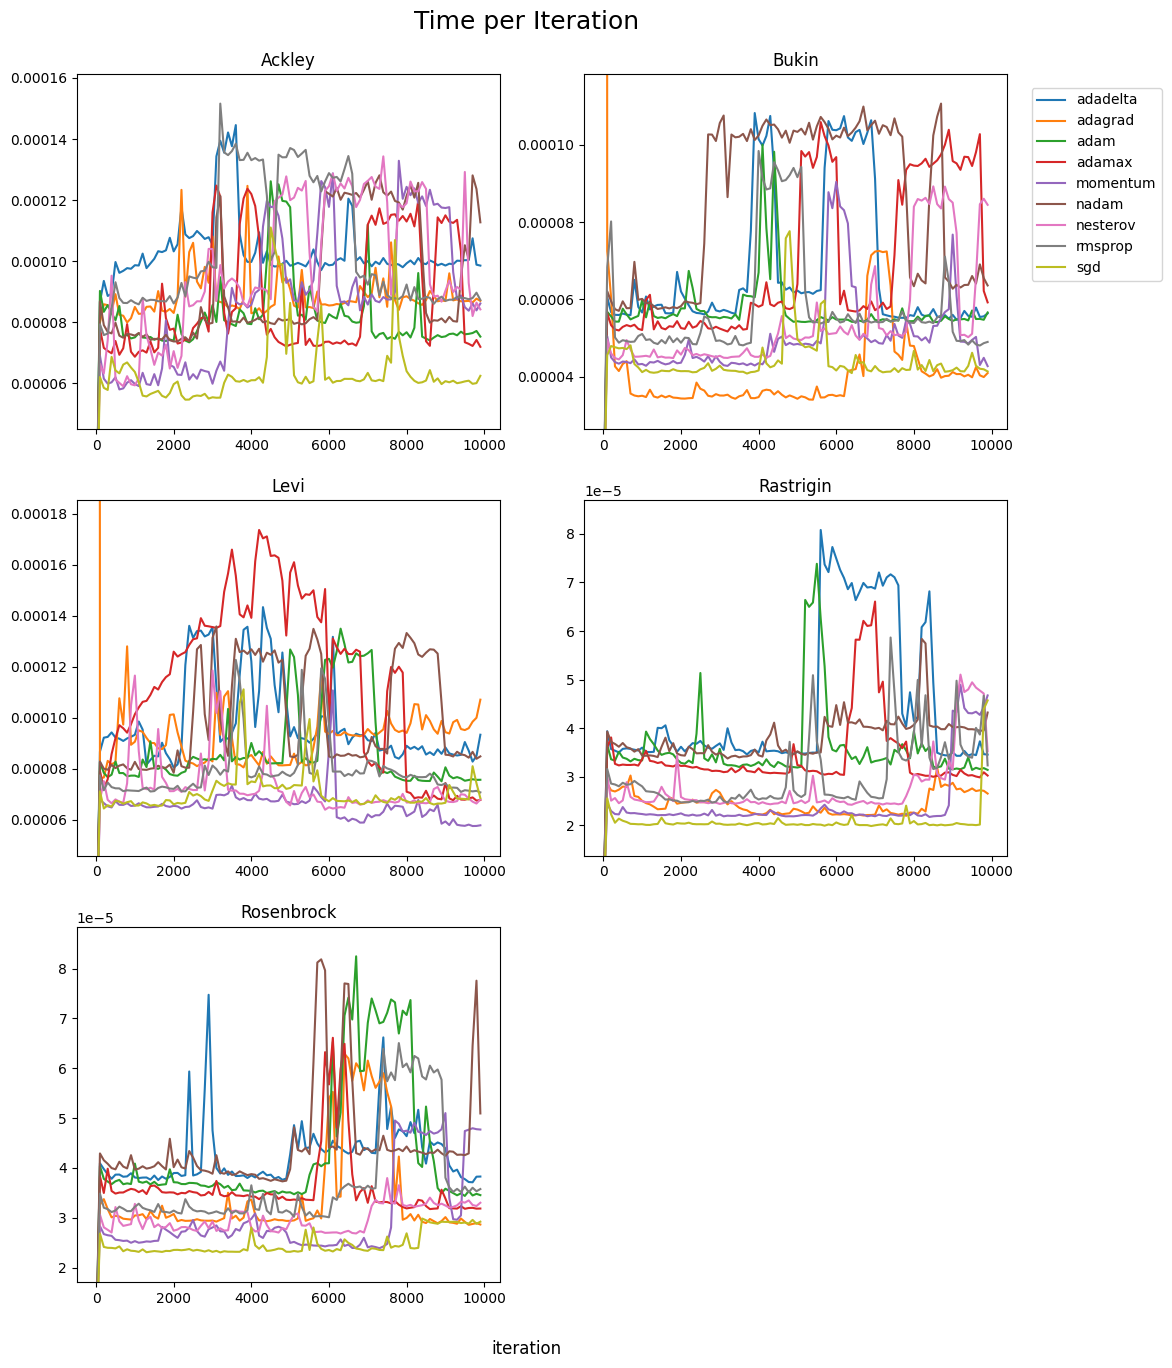

In [185]:
show()